<a href="https://colab.research.google.com/github/chiyanglin-AStar/python_stock_study/blob/main/%E6%AF%8F%E6%97%A5%E8%82%A1%E7%A5%A8_K_Line.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#【python】教你簡單爬取全球指數股價
### ref : https://chenchenhouse.com/python001/
###     https://chenchenhouse.com/python002/
    

PART 1:練習抓取個股資料

In [8]:
!pip install --upgrade mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 2.5 MB/s eta 0:00:00


In [9]:
import requests
import json
import pandas as pd
import matplotlib
import mplfinance as mpf
# 導入pandas、matplotlib、mplfinance模組，將mplfinance模組縮寫為mpf
# 這邊要導入matplotlib的原因是因為mplfinance繪圖時需要調用mptplotlib模組
from io import StringIO

In [3]:
url = "https://query1.finance.yahoo.com/v7/finance/download/2330.TW?period1=1572420723&amp;period2=1604043123&amp;interval=1d&amp;events=history&amp;includeAdjustedClose=true"
response = requests.get(url)
#response.text

In [5]:
url = "https://query1.finance.yahoo.com/v7/finance/download/2330.TW?period1=1613737750&period2=1645273750&interval=1d&events=history&includeAdjustedClose=true"
headers = {
    "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.102 Safari/537.36"
}
response = requests.get(url,headers = headers)
#response.text

In [10]:
df = pd.read_csv(StringIO(response.text),index_col = "Date",parse_dates = ["Date"])
#df

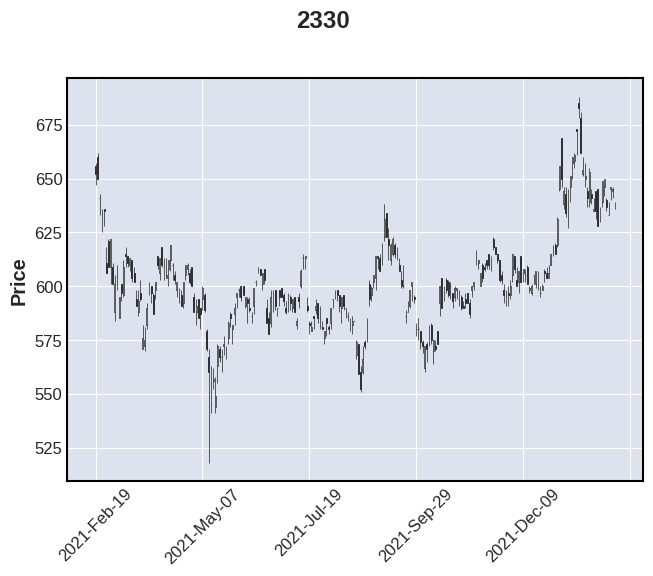

In [11]:
mpf.plot(df, type='candle', title='2330')

<Axes: xlabel='Date'>

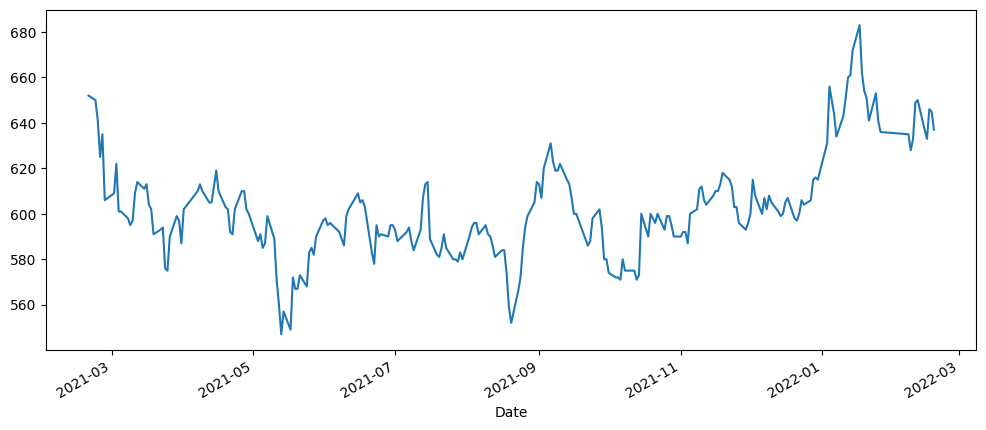

In [ ]:
df.Close.plot(figsize=(12,5))

PART 2:快速變更股票代碼、區間資料

In [ ]:
import datetime

In [ ]:
time_start = input("輸入開始日期 : ")
time_end = input("輸入結束日期 : ")
initial = datetime.datetime.strptime( '1970-01-01' , '%Y-%m-%d' )
start = datetime.datetime.strptime( str(time_start) , '%Y-%m-%d' )
end = datetime.datetime.strptime( str(time_end), '%Y-%m-%d' )
print("初始時間 : " + str(initial))
print("開始時間 : " + str(start))
print("結束時間 : " + str(end))

In [ ]:
period1 = start - initial
period2 = end - initial
print("開始時間差距 : " + str(period1))
print("結束時間差距 : " + str(period2))

In [ ]:
days = 24 * 60 * 60    #一天有86400秒 
s1 = period1.days * days
s2 = period2.days * days
print("開始時間 : " + str(s1))
print("結束時間 : " + str(s2))

In [ ]:
days = 24 * 60 * 60    #一天有86400秒 
stock_id = input("請輸入股票代碼 : ",)
time_start = input("輸入開始日期 : ")
time_end = input("輸入結束日期 : ")
initial = datetime.datetime.strptime( '1970-01-01' , '%Y-%m-%d' )
start = datetime.datetime.strptime( str(time_start) , '%Y-%m-%d' )
end = datetime.datetime.strptime( str(time_end), '%Y-%m-%d' )
period1 = start - initial
period2 = end - initial
s1 = period1.days * days
s2 = period2.days * days
url = "https://query1.finance.yahoo.com/v7/finance/download/" + stock_id + "?period1=" + str(s1) + "&amp;period2=" + str(s2) + "&amp;interval=1d&amp;events=history&amp;includeAdjustedClose=true"
response = requests.get(url)
df = pd.read_csv(StringIO(response.text),index_col = "Date",parse_dates = ["Date"])
df.Close.plot(figsize=(12,5))

In [ ]:
while True:
    try:
        days = 24 * 60 * 60    #一天有86400秒 
        stock_id = input("請輸入股票代碼 : ",)
        time_start = input("輸入開始日期 : ")
        time_end = input("輸入結束日期 : ")
        initial = datetime.datetime.strptime( '1970-01-01' , '%Y-%m-%d' )
        start = datetime.datetime.strptime( str(time_start) , '%Y-%m-%d' )
        end = datetime.datetime.strptime( str(time_end), '%Y-%m-%d' )
        period1 = start - initial
        period2 = end - initial
        s1 = period1.days * days
        s2 = period2.days * days
        url = url = "https://query1.finance.yahoo.com/v7/finance/download/" + stock_id + "?period1=" + str(s1) + "&amp;period2=" + str(s2) + "&amp;interval=1d&amp;events=history&amp;includeAdjustedClose=true"
        response = requests.get(url)
        df = pd.read_csv(StringIO(response.text),index_col = "Date",parse_dates = ["Date"])
        df.Close.plot(figsize=(12,5))
        break
    except:
        print("輸入錯誤格式，請重新輸入")

In [ ]:
#address = r"C:\Users\adsad\OneDrive\Desktop\stock\\" + stock_id + ".csv"
#df.to_csv(address)